### Creates dataframe with metrics for [ocetrac](https://github.com/ocetrac/marine-heatwaves/blob/main/ocetrac_metrics.ipynb) events

Statistical analysis of events tracked with ocetrac

### Load libraries

In [2]:
import dask

import pandas as pd
import netCDF4

import xarray as xr
import numpy as np
import pandas as pd
import dask.array as da
import ocetrac


import warnings
warnings.filterwarnings('ignore')
from datetime import date

import matplotlib.pyplot as plt

print('loaded libraries')

loaded libraries


In [3]:
dir_path = "/pub/hfdrake/datasets/CM4_MHW_blobs/"

In [4]:
ds = xr.open_dataset(f"{dir_path}/data/ocean_daily_cmip.01860101-01901231.tos.nc", chunks={'time':100})

In [5]:
ds_region = ds.sel(xh = slice(-138, 0), yh = slice(8, 49)).isel(time=slice(111,341))

In [6]:
static = xr.open_dataset(f"{dir_path}/data/ocean_daily_cmip.static.nc")

In [7]:
static_region = static.sel(xh = slice(-138, 0), yh = slice(8, 49))

In [8]:
ds_static_region = xr.merge([static_region,ds_region])

In [9]:
mt_path = "/pub/mariant3/WarmWaterMasses/02_tracking-mhws/"

In [10]:
ocetrac_labels = xr.open_dataset(f"{mt_path}/ocetrac_labels.nc", chunks={'time':1})

In [11]:
ocetrac_labels

<xarray.Dataset>
Dimensions:  (time: 230, yh: 193, xh: 547)
Coordinates:
  * xh       (xh) float64 -137.9 -137.7 -137.4 ... -0.7242 -0.4758 -0.2274
  * yh       (yh) float64 8.222 8.469 8.716 8.963 ... 48.43 48.59 48.76 48.92
  * time     (time) object 0186-04-22 12:00:00 ... 0186-12-07 12:00:00
Data variables:
    blobs    (time, yh, xh) float64 dask.array<chunksize=(1, 193, 547), meta=np.ndarray>
    lsmask   (yh, xh) bool dask.array<chunksize=(193, 547), meta=np.ndarray>
Attributes:
    description:  Ocetrac labels
    data:         CM4.0 preprocessed for Ocetrac
    threshold:    90th percentile
    climatology:  entire period

In [12]:
labels = ocetrac_labels['blobs']
num_events = labels.attrs['final objects tracked']
print(f"There are {num_events} total events tracked.")
ocetrac_labels

There are 29 total events tracked.


<xarray.Dataset>
Dimensions:  (time: 230, yh: 193, xh: 547)
Coordinates:
  * xh       (xh) float64 -137.9 -137.7 -137.4 ... -0.7242 -0.4758 -0.2274
  * yh       (yh) float64 8.222 8.469 8.716 8.963 ... 48.43 48.59 48.76 48.92
  * time     (time) object 0186-04-22 12:00:00 ... 0186-12-07 12:00:00
Data variables:
    blobs    (time, yh, xh) float64 dask.array<chunksize=(1, 193, 547), meta=np.ndarray>
    lsmask   (yh, xh) bool dask.array<chunksize=(193, 547), meta=np.ndarray>
Attributes:
    description:  Ocetrac labels
    data:         CM4.0 preprocessed for Ocetrac
    threshold:    90th percentile
    climatology:  entire period

In [13]:
labels.compute();

In [ ]:
#%%time  # this works as well as .compute()
#labels.load()

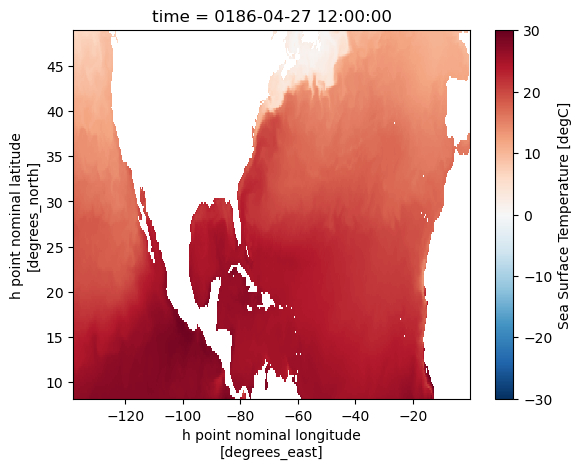

In [14]:
ds_static_region['tos'].isel(time=5).plot()

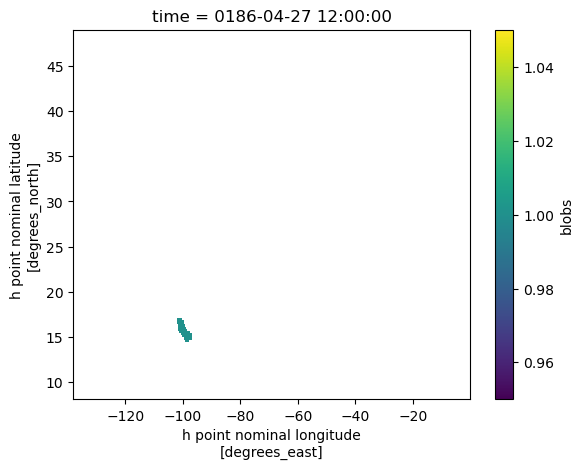

In [15]:
labels.isel(time=5).plot()

In [16]:
ids = np.unique(labels.sel(xh = slice(-138, 0), yh = slice(8, 49)))
ids = np.array([id for id in ids if ~np.isnan(id)])
ids

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29.])

In [17]:
labels.where(labels==1.)

<xarray.DataArray 'blobs' (time: 230, yh: 193, xh: 547)>
dask.array<where, shape=(230, 193, 547), dtype=float64, chunksize=(1, 193, 547), chunktype=numpy.ndarray>
Coordinates:
  * xh       (xh) float64 -137.9 -137.7 -137.4 ... -0.7242 -0.4758 -0.2274
  * yh       (yh) float64 8.222 8.469 8.716 8.963 ... 48.43 48.59 48.76 48.92
  * time     (time) object 0186-04-22 12:00:00 ... 0186-12-07 12:00:00
Attributes:
    inital objects identified:  1583
    final objects tracked:      29
    radius:                     2
    size quantile threshold:    0.75
    min area:                   99.0
    percent area reject:        0.13257131261084004
    percent area accept:        0.8674286873891599

In [17]:
labels.load();

In [18]:
area_list = []
labels.load()

for id in ids:
    print(id)
    #print(i)
    event = labels.where(labels==id, drop=True)
    event_mask = event == id
    event_area = (ds_static_region.areacello).where(event_mask).sel(xh = slice(-138, 0), yh = slice(8, 49)).sum(['xh','yh'])
    print(event_area)
    area_list.append(event_area)
    break

1.0
<xarray.DataArray 'areacello' (time: 5)>
array([7.3090851e+10, 8.3231433e+10, 8.9033679e+10, 1.6331070e+11,
       7.9596405e+10], dtype=float32)
Coordinates:
  * time     (time) object 0186-04-26 12:00:00 ... 0186-04-30 12:00:00


In [19]:
area_list

[<xarray.DataArray 'areacello' (time: 5)>
 array([7.3090851e+10, 8.3231433e+10, 8.9033679e+10, 1.6331070e+11,
        7.9596405e+10], dtype=float32)
 Coordinates:
   * time     (time) object 0186-04-26 12:00:00 ... 0186-04-30 12:00:00]

In [20]:
id

1.0

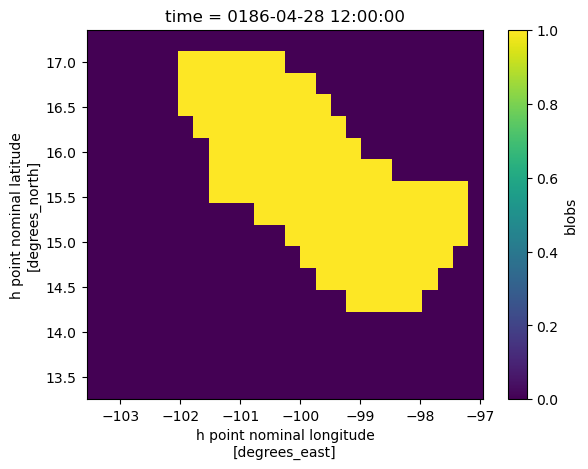

In [21]:
(event == id).isel(time=2).plot()

In [22]:
ssta = ds_static_region.tos

In [23]:
event_ssta = ssta.where(event>0, drop=True)
event_ssta

<xarray.DataArray 'tos' (time: 5, yh: 17, xh: 26)>
dask.array<where, shape=(5, 17, 26), dtype=float32, chunksize=(5, 17, 26), chunktype=numpy.ndarray>
Coordinates:
  * xh       (xh) float64 -103.4 -103.2 -102.9 -102.7 ... -97.58 -97.33 -97.08
  * yh       (yh) float64 13.38 13.62 13.86 14.11 ... 16.52 16.76 17.0 17.23
  * time     (time) object 0186-04-26 12:00:00 ... 0186-04-30 12:00:00
Attributes:
    long_name:      Sea Surface Temperature
    units:          degC
    cell_methods:   area:mean yh:mean xh:mean time: mean
    cell_measures:  area: areacello
    time_avg_info:  average_T1,average_T2,average_DT
    standard_name:  sea_surface_temperature

1.0
[7.3090851e+10 8.3231433e+10 8.9033679e+10 1.6331070e+11 7.9596405e+10]
2.0
[8.6782460e+10 1.5158202e+11 2.1232414e+11 2.6477294e+11 2.7484586e+11
 2.1797246e+11 3.9473073e+11 6.8941657e+11 8.0916447e+11 9.4410192e+11
 1.0721263e+12 1.1150801e+12 1.1630176e+12 1.2029040e+12 9.3489699e+11
 8.7179605e+11 6.5255322e+11 6.3060948e+11 8.3758763e+11 9.3351746e+11
 1.0192633e+12 7.3636079e+11 2.0262845e+11]
3.0
[1.0040146e+11 1.4304009e+11 1.9317236e+11 3.4703376e+11 4.8996883e+11
 6.6917945e+11 7.2799171e+11 7.7769920e+11 7.7368643e+11 7.4343200e+11
 7.7711639e+11 7.2662765e+11 8.5796743e+11 8.0858730e+11 7.6099145e+11
 5.8816817e+11 3.6690349e+11 2.8562440e+11 3.0247348e+11 2.3594446e+11
 1.1770154e+11]
4.0
[1.1590236e+11 1.2181198e+11 1.2093148e+11]
5.0
[9.0318889e+10 1.0162204e+11 7.3436611e+10]
6.0
[7.5812790e+10 1.2685066e+11 1.6267330e+11 1.6249517e+11 1.2209214e+11]
7.0
[8.365554e+10 9.020729e+10]
8.0
[1.666147e+11 1.790262e+11 7.378572e+10]
9.0
[6.69120512e+10 8.95999590e+10 1.29

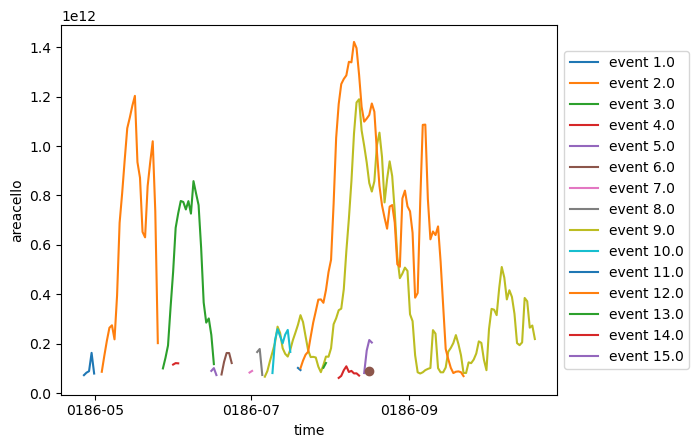

In [24]:
for id in ids:
    print(id)
    #print(i)
    event = labels.where(labels==id, drop=True)
    #print(event)
    event_mask = event == event
    #print(event_mask)
    event_area = (ds_static_region.areacello).where(event_mask).sel(xh = slice(-138, 0), yh = slice(8, 49)).sum(['xh','yh'])
    print(event_area.values)
    try:
        #fig = plt.figure()
        #ax = plt.subplot(111)
        event_area.plot(label=f'event {id}')
        plt.legend()
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    except TypeError:
        print(f'Could not plot {id} event')
        plt.plot(event_area.time, event_area, "o")
        break

In [27]:
area_list = []
max_intensity_list = []

for i in range(len(ids)):
    current_event_i = ids[i]
    event_mask_curr = current_event_i == current_event_i
    event_area = (ds_static_region.areacello).where(event_mask_curr).sum(['xh','yh'])
    #print(event_area.values.item(0))
    area_list += [event_area.values.item(0)]
    #max_intensity_list +=
    temp_mask_curr = (ds_static_region.tos).where(event_mask_curr).mean(['xh','yh'])
    print(np.max(temp_mask_curr.values))
    max_intensity_list += [np.max(temp_mask_curr.values)] #add -29 to get the actual max intensity
    

24.28292
24.28292
24.28292
24.28292
24.28292
24.28292
24.28292
24.28292
24.28292
24.28292
24.28292
24.28292
24.28292
24.28292
24.28292
24.28292
24.28292
24.28292
24.28292
24.28292
24.28292
24.28292
24.28292
24.28292
24.28292
24.28292
24.28292
24.28292
24.28292


1.0
[29.24365  29.243252 29.268326 29.258448 29.249216]
2.0
[29.32041  29.33025  29.330431 29.366737 29.3735   29.480255 29.436333
 29.419584 29.41055  29.36738  29.344086 29.398872 29.419636 29.447613
 29.533152 29.4847   29.475101 29.505938 29.492136 29.484066 29.399605
 29.269178 29.139086]
3.0
[29.330599 29.345823 29.252573 29.32658  29.459194 29.52658  29.566784
 29.646772 29.642717 29.571678 29.509808 29.383951 29.366821 29.452015
 29.370543 29.26605  29.325506 29.438847 29.374153 29.358759 29.311539]
4.0
[29.108103 29.213705 29.119719]
5.0
[29.345213 29.361431 29.16828 ]
6.0
[29.406664 29.420399 29.530464 29.565989 29.451614]
7.0
[29.351912 29.427185]
8.0
[29.234085 29.352959 29.357729]
9.0
[29.300098 29.353563 29.42781  29.45728  29.58772  29.829035 29.928467
 29.714071 29.572935 29.608152 29.72902  29.903904 29.830294 29.737745
 29.796024 29.884768 29.923792 30.013395 30.054132 29.928944 29.810064
 29.628687 29.581926 29.671097 29.68601  29.731228 29.718582 29.963419
 30.00793

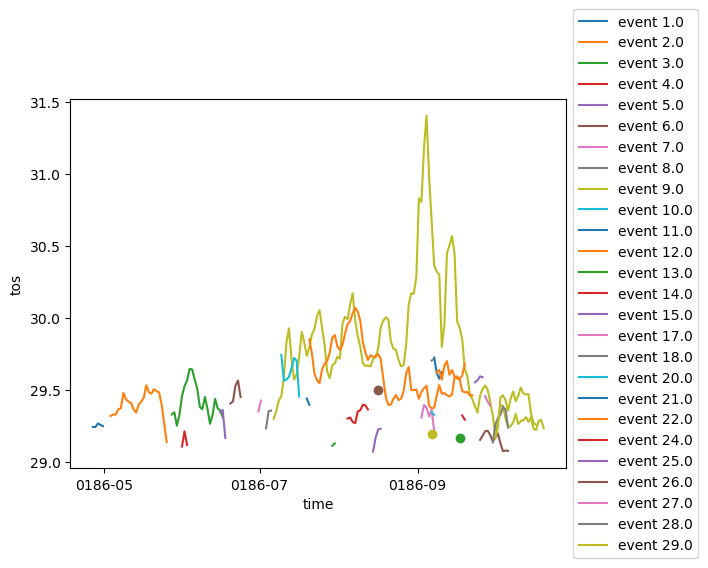

In [30]:
for id in ids:
    print(id)
    #print(i)
    event = labels.where(labels==id, drop=True)
    event_mask = event == event
    event_temperature = (ds_static_region.tos).where(event_mask).sel(xh = slice(-138, 0), yh = slice(8, 49)).mean(['xh','yh'])
    print(event_temperature.values)
    try:
        event_temperature.plot(label=f'event {id}')
        plt.legend()
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    except TypeError:
        print(f'Could not plot {id} event')
        plt.plot(event_temperature.time, event_temperature, "o")
        #break

In [31]:
for id in ids:
    print(id)
    #print(i)
    event = labels.where(labels==id, drop=True)
    event_mask = event == event
    event_temperature_min = (ds_static_region.tos).where(event_mask).sel(xh = slice(-138, 0), yh = slice(8, 49)).min(['xh','yh'])
    event_temperature_max = (ds_static_region.tos).where(event_mask).sel(xh = slice(-138, 0), yh = slice(8, 49)).max(['xh','yh'])
    print('min temp')
    print(event_temperature_min.values)
    print('max temp')
    print(event_temperature_max.values)

1.0
min temp
[29.003841 29.004618 29.011986 29.000965 28.9424  ]
max temp
[29.64891  29.534195 29.562487 29.61408  29.56635 ]
2.0
min temp
[28.9898   28.981318 28.962107 28.953136 28.898605 28.961178 28.872875
 28.791325 28.619698 28.7786   28.806812 28.754614 28.855083 28.77119
 28.914001 28.72213  28.920078 28.974287 28.839193 28.882128 28.783234
 28.838596 28.838442]
max temp
[29.648205 29.86593  29.99769  30.158232 30.227608 30.366276 30.577562
 30.524511 30.282787 29.90784  29.980322 30.13318  30.183128 30.41758
 30.44476  30.314291 30.249355 30.298822 30.398706 30.537539 30.35287
 29.960697 29.567362]
3.0
min temp
[28.988686 28.940107 28.918646 28.833906 28.734447 28.872883 28.881765
 28.863468 28.85584  28.646584 28.771584 28.893522 28.770933 28.822483
 28.856503 28.835215 28.748156 28.601831 28.78179  28.857393 28.935848]
max temp
[29.836258 29.851784 29.734804 30.057089 30.454035 30.46838  30.451525
 30.681967 30.66138  30.580276 30.61194  30.468653 30.307035 30.30992
 30.2683

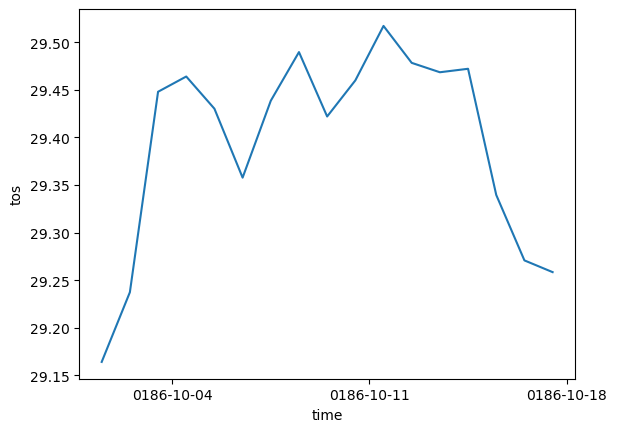

In [40]:
(ds_static_region.tos).where(event_mask).mean(['xh','yh']).plot()

In [41]:
import os, glob
import xarray as xr
import numpy as np
import pandas as pd
import warnings
from skimage.measure import label as label_np
from skimage.measure import regionprops 

try:
    from tqdm.auto import tqdm
    tqdm_avail = True
except:
    warnings.warn(
        "Optional dependency `tqdm` not found. This will make progressbars a lot nicer. \
    Install with `conda install -c conda-forge tqdm`"
    )
    tqdm_avail = False
    
def _wrap(labels):
    ''' Impose periodic boundary and wrap labels, then reorder the labels'''
    first_column = labels[..., 0]
    last_column = labels[..., -1]

    stacked = first_column.stack(z=['time','yh'])
    unique_first = np.unique(stacked[stacked.notnull()])

    # This loop iterates over the unique values in the first column, finds the location of those values in 
    # the first columnm and then uses that index to replace the values in the last column with the first column value
    for i in enumerate(unique_first):
        first = np.where(first_column == i[1])
        last = last_column[first[0], first[1]]
        stacked = last.stack(z=['time','yh'])
        bad_labels = np.unique(stacked[stacked.notnull()])
        replace = np.isin(labels, bad_labels)
        labels = labels.where(replace==False, other=i[1])
    
    labels = labels.fillna(0)
    labels_wrapped = np.unique(labels, return_inverse=True)[1].reshape(labels.shape)
    labels_wrapped = xr.DataArray(labels_wrapped, dims=labels.dims, coords=labels.coords)

    return labels_wrapped

def _get_labels(binary_images):
    '''function used to label binary images at each time step using skimage.measure.label'''
    blobs_labels = label_np(binary_images, background=0)
    return blobs_labels
    
def _get_centroids(sub_labels):
    '''This function uses skimage.measure.regionprops to find the centroids of objects assigned 
    to each unique label'''
    props = regionprops(sub_labels.astype('int'))
    centroids = [(float(sub_labels.yh[round(p.centroid[0])].values),
                  float(sub_labels.xh[round(p.centroid[1])].values)) for p in props]
    for i in range(0,len(centroids)):
        if centroids[i][1] >= 359.875:
            centroids[i] = (centroids[i][0], list(centroids[i])[1] - 359.875)
    
    return centroids

def _get_intensity_area(event, ssta, mhw):
    '''Calculates event intensities and area at each time interval using anomaly data and coordinates 
    cooresponding to the event.'''
    
    event_ssta = ssta.where(event>0, drop=True)        
    mhw['intensity_mean'].append(event_ssta.mean(('yh','xh')).values)
    mhw['intensity_max'].append(event_ssta.max(('yh','xh')).values) 
    mhw['intensity_min'].append(event_ssta.min(('yh','xh')).values)
    mhw['intensity_cumulative'].append(np.nansum(event_ssta))
    coords = event.stack(z=('yh','xh'))
    coord_pairs = [(coords.isel(time=t[0]).dropna(dim='z', how='any').z.yh.values, 
                      coords.isel(time=t[0]).dropna(dim='z', how='any').z.xh.values) for t in enumerate(event.time)]

    mhw['coords'].append(coord_pairs)
    
    # Calculate weighted cell area assuming 0.25º resolution data and 111 km per degree of latitude
    
    #for id in ids:
        #print(id)
        #print(i)
        #events = labels.where(labels==id, drop=True)
        #event_mask = events == id
   # event_area
    #event_mask = events == event
    event_ssta_mask = event_ssta == event_ssta
    #print(event_ssta == event_ssta)
    #print(event_ssta.areacello.sum(('yh','xh')).values)
    event_area = (ds_static_region.areacello).where(event_ssta_mask).sel(xh = slice(-138, 0), yh = slice(8, 49)).sum(['xh','yh'])
    #print(event_area.values)
    cell_area = event_area.values
    mhw['area'].append(cell_area)
    

    #y, x = zip(*coord_pairs)
    #dlon = [np.cos(y[c]*np.pi/180)*(111*.25) for c in np.arange(0, len(coord_pairs))]
    #dlat = (111*.25) * np.ones(len(dlon))
    #cell_area = [np.sum(dlon[c]*dlat[c]) for c in np.arange(0, len(coord_pairs))]
    #mhw['area'].append(cell_area)

    
    return mhw

In [42]:
def _get_metrics(event, ssta):
    '''
    Creates a Pandas DataFrame of event attributes.
    
    Parameters
    ----------
      event : xarray.DataArray   
              Image set containing only objects corresponding to the event of interest. 
              Dimensions should be ('time', 'lat', 'lon')
              
      ssta  : xarray.DataArray
              Temperature vector [1D numpy array of length T]
    
    Returns
    -------
    
    mhw : pandas.DataFrame
          Marine heat wave event attributes. The keys listed below are 
          are contained within the dataset.
 
        'id'                     Unique label given to the MHW [int]
        'date'                   Dates corresponding to the event [datetime format]
        'coords'                 Latitude and longitude of all points contained in the event [tuple(lat,lon)]
        'centroid'               Center of each object contained in the event [tuple(lat,lon)]
        'duration'               Duration of event [months]
        'intensity_max'          Maximum intensity at each time interval [degC]
        'intensity_mean'         Mean intensity at each time interval [degC]
        'intensity_min'          Minimum intensity at each time interval [degC]
        'intensity_cumulative'   Cumulated intensity over the entire event [degC months]
        'area'                   Area of the event at each time interval [km2]
        
    '''
    
    # Initialize dictionary 
    mhw = {}
    mhw['id'] = [] # event label
    mhw['date'] = [] # datetime format
    mhw['coords'] = [] # (lat, lon)
    mhw['centroid'] = []  # (lat, lon)
    mhw['duration'] = [] # [months]
    mhw['intensity_max'] = [] # [deg C]
    mhw['intensity_mean'] = [] # [deg C]
    mhw['intensity_min'] = [] # [deg C]
    mhw['intensity_cumulative'] = [] # [deg C]
    mhw['area'] = [] # [km2]

    # TO ADD:
    # mhw['rate_onset'] = [] # [deg C / month]
    # mhw['rate_decline'] = [] # [deg C / month]

    mhw['id'].append(int(np.nanmedian(event.values)))
    mhw['date'].append(event.time.values.astype('datetime64[D]'))
    mhw['duration'].append(event.time.shape[0])

    # Turn images into binary
    binary_event = event.where(event>=0, other=0)
    binary_event = binary_event.where(binary_event==0, other=1)
      
    sub_labels = xr.apply_ufunc(_get_labels, binary_event,
                                input_core_dims=[['yh', 'xh']],
                                output_core_dims=[['yh', 'xh']],
                                output_dtypes=[binary_event.dtype],
                                vectorize=True,
                                dask='parallelized')
    
    # Turn background to NaNs
    sub_labels = xr.DataArray(sub_labels, dims=binary_event.dims, coords=binary_event.coords)
    sub_labels = sub_labels.where(sub_labels>0, drop=False, other=np.nan) 

    # The labels are repeated each time step, therefore we relabel them to be consecutive
    for p in range(1, sub_labels.shape[0]):
        sub_labels[p,:,:] = sub_labels[p,:,:].values + sub_labels[p-1,:,:].max().values
    
    sub_labels_wrapped = _wrap(sub_labels)
    
    mhw = _get_intensity_area(event, ssta, mhw)
    
 # '  centroid = []
 #   for s in np.arange(0, sub_labels_wrapped.shape[0]):
 #       lx = sub_labels_wrapped.isel(time=s)
 #       east = lx.where(lx.xh < 180, drop=True)
 #       east['xh'] = labels.xh
 #       append_east = xr.concat([lx.where(lx.xh >= 180, drop=True), east], dim="xh")
#        centroid.append(_get_centroids(append_east))
#    mhw['centroid'].append(centroid)'
    
    mhw = pd.DataFrame(dict([(name, pd.Series(data)) for name,data in mhw.items()]))
#     mhw.to_csv('df_'+str(mhw['id'].values[0]).zfill(4)+'.csv', index=False)
    return mhw


In [43]:
dataframes = []  
for i in range(1,num_events+1):
    print(i)
    event = labels.where(labels==i, drop=True)
    df = _get_metrics(event, ssta)
    dataframes.append(df)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


In [44]:
dff = pd.concat(dataframes, ignore_index=True)

In [45]:
dff

,id,date,coords,centroid,duration,intensity_max,intensity_mean,intensity_min,intensity_cumulative,area
0,1,"[0186-04-26, 0186-04-27, 0186-04-28, 0186-04-2...","[([14.589726512825457, 14.589726512825457, 14....",NaN,5,"[29.64891, 29.534195, 29.562487, 29.61408, 29....","[29.24365, 29.243252, 29.268326, 29.258448, 29...","[29.003841, 29.004618, 29.011986, 29.000965, 2...",1.986341e+04,"[73090850000.0, 83231430000.0, 89033680000.0, ..."
1,2,"[0186-05-03, 0186-05-04, 0186-05-05, 0186-05-0...","[([14.589726512825457, 14.589726512825457, 14....",NaN,23,"[29.648205, 29.86593, 29.99769, 30.158232, 30....","[29.32041, 29.33025, 29.330431, 29.366737, 29....","[28.9898, 28.981318, 28.962107, 28.953136, 28....",6.151751e+05,"[86782460000.0, 151582020000.0, 212324140000.0..."
2,3,"[0186-05-27, 0186-05-28, 0186-05-29, 0186-05-3...","[([12.157724627851596, 12.157724627851596, 12....",NaN,21,"[29.836258, 29.851784, 29.734804, 30.057089, 3...","[29.330599, 29.345823, 29.252573, 29.32658, 29...","[28.988686, 28.940107, 28.918646, 28.833906, 2...",4.343108e+05,"[100401460000.0, 143040090000.0, 193172360000...."
3,4,"[0186-05-31, 0186-06-01, 0186-06-02]","[([8.71618532806131, 8.71618532806131, 8.71618...",NaN,3,"[29.38724, 29.547087, 29.4026]","[29.108103, 29.213705, 29.119719]","[28.950464, 28.902033, 28.910402]",1.399099e+04,"[115902360000.0, 121811980000.0, 120931480000.0]"
4,5,"[0186-06-15, 0186-06-16, 0186-06-17]","[([19.84112685293801, 19.84112685293801, 19.84...",NaN,3,"[30.238787, 30.305285, 30.252745]","[29.345213, 29.361431, 29.16828]","[28.962175, 28.957989, 28.90289]",1.163305e+04,"[90318890000.0, 101622040000.0, 73436610000.0]"
5,6,"[0186-06-19, 0186-06-20, 0186-06-21, 0186-06-2...","[([21.478515716891593, 21.478515716891593, 21....",NaN,5,"[30.683111, 30.79181, 30.988703, 31.209797, 31...","[29.406664, 29.420399, 29.530464, 29.565989, 2...","[28.748901, 28.79195, 28.755537, 28.81926, 28....",2.999014e+04,"[75812790000.0, 126213450000.0, 162036070000.0..."
6,7,"[0186-06-30, 0186-07-01]","[([23.32746053066586, 23.32746053066586, 23.32...",NaN,2,"[30.770292, 30.689823]","[29.351912, 29.427185]","[28.852798, 28.830278]",8.053263e+03,"[83018330000.0, 89570070000.0]"
7,8,"[0186-07-03, 0186-07-04, 0186-07-05]","[([12.402004520119256, 12.402004520119256, 12....",NaN,3,"[29.708344, 29.915413, 29.812866]","[29.234085, 29.352959, 29.357729]","[28.874962, 28.927378, 29.0021]",1.693927e+04,"[166614700000.0, 179026200000.0, 73785720000.0]"
8,9,"[0186-07-06, 0186-07-07, 0186-07-08, 0186-07-0...","[([21.24569168928477, 21.24569168928477, 21.24...",NaN,107,"[30.8939, 31.088123, 31.253002, 31.444292, 31....","[29.300098, 29.353563, 29.42781, 29.45728, 29....","[28.867064, 28.853947, 28.911074, 28.60785, 28...",1.706500e+06,"[66274836000.0, 88962744000.0, 128821930000.0,..."
9,10,"[0186-07-09, 0186-07-10, 0186-07-11, 0186-07-1...","[([25.151030584884086, 25.151030584884086, 25....",NaN,8,"[31.11896, 31.246496, 31.271227, 31.378536, 31...","[29.743496, 29.564592, 29.572159, 29.592905, 2...","[28.46238, 28.607044, 28.76227, 28.886917, 28....",8.057264e+04,"[80417550000.0, 211273610000.0, 255430480000.0..."


In [46]:
dff.to_csv('/pub/mariant3/WarmWaterMasses/02_tracking-mhws/blobs_0186_ocetrac_metrics.csv', index=False)

<Axes: >

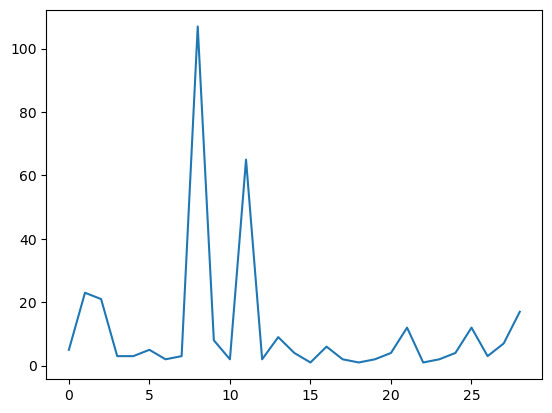

In [105]:
dff.duration.plot()

In [128]:
e = 8

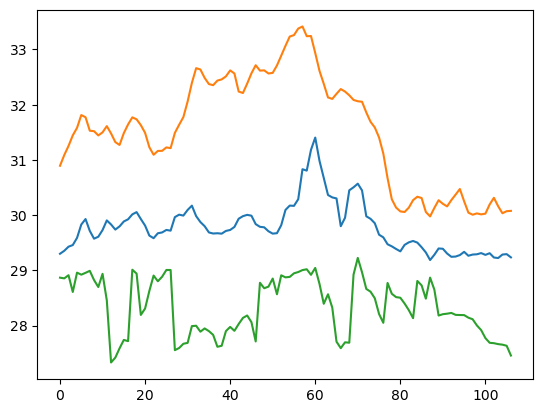

In [129]:
plt.plot(dff['intensity_mean'][e])
plt.plot(dff['intensity_max'][e])
plt.plot(dff['intensity_min'][e])